In [1]:
#Importing libraries for EDA 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
#Importing data
eth = pd.read_csv('./datasets/Ethereum Historical Data.csv')
btc = pd.read_csv('./datasets/BTC-USD.csv')
eos = pd.read_csv('./datasets/EOS-USD.csv')
doge = pd.read_csv('./datasets/DOGE-USD.csv')
ada = pd.read_csv('./datasets/ADA-USD.csv')

In [3]:
#Taking a look at data for etherium
eth


,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 10, 2016",11.75,11.20,11.85,11.07,0.00K,4.91%
1,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70%
2,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12%
3,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64%
4,"Mar 14, 2016",12.50,15.07,15.07,11.40,92.18K,-17.05%
...,...,...,...,...,...,...,...
1885,"May 08, 2021",3905.55,3479.81,3952.88,3453.37,1.34M,12.19%
1886,"May 09, 2021",3922.23,3905.69,3979.77,3734.44,1.94M,0.43%
1887,"May 10, 2021",3947.90,3923.48,4203.98,3669.84,2.70M,0.65%
1888,"May 11, 2021",4167.78,3948.66,4177.53,3781.86,1.27M,5.57%


In [4]:
#Checking to seee if there are any missing values
eth.isnull().any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [5]:
#Checking to see the data types of each column
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1890 non-null   object 
 1   Price     1890 non-null   float64
 2   Open      1890 non-null   float64
 3   High      1890 non-null   float64
 4   Low       1890 non-null   float64
 5   Vol.      1890 non-null   object 
 6   Change %  1890 non-null   object 
dtypes: float64(4), object(3)
memory usage: 103.5+ KB


In [6]:
#replacing the K and M in 'vol.' column to 0**3 and 0**6 to convert the dtype to float
eth['Vol.'] = eth['Vol.'].replace('-','0')

eth['Vol.'] = (eth['Vol.'].replace(r'[KM]+$', '', regex=True).astype(float) * eth['Vol.'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))


In [7]:
#changing the date column from a object to datetime
eth.Date = eth.Date.astype('datetime64')

In [8]:

#Creating a function to easily replace vlaues and make changes to columns.
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    
    if '%' in x:
        return float(x.replace('%','')) / 100
    
eth['Change %'] = eth['Change %'].apply(value_to_float)

In [9]:
#checking if the function worked
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1890 non-null   datetime64[ns]
 1   Price     1890 non-null   float64       
 2   Open      1890 non-null   float64       
 3   High      1890 non-null   float64       
 4   Low       1890 non-null   float64       
 5   Vol.      1890 non-null   float64       
 6   Change %  1890 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 103.5 KB


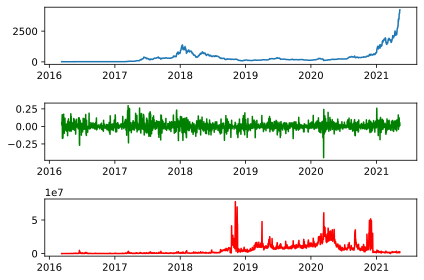

In [10]:
#Plotting the close, Volume and pct. change of ETH

fig, (ax1,ax2,ax3) = plt.subplots(3,1)

ax1.plot(eth['Date'],eth['Price'])
ax2.plot(eth['Date'],eth['Change %'],color = 'g')
ax3.plot(eth['Date'],eth['Vol.'],color = 'r')


fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.tight_layout()
%config InlineBackend.figure_format = 'svg'

In [11]:
eth['close']=eth['Price']
eth['pct_chng']=eth['Change %']
eth['vol']=eth['Vol.']

eth_cleaned=eth.drop(eth.iloc[:,1:7], axis = 1)

eth_cleaned




,Date,close,pct_chng,vol
0,2016-03-10,11.75,0.0491,0.0
1,2016-03-11,11.95,0.0170,180.0
2,2016-03-12,12.92,0.0812,830.0
3,2016-03-13,15.07,0.1664,1300.0
4,2016-03-14,12.50,-0.1705,92180.0
...,...,...,...,...
1885,2021-05-08,3905.55,0.1219,1340000.0
1886,2021-05-09,3922.23,0.0043,1940000.0
1887,2021-05-10,3947.90,0.0065,2700000.0
1888,2021-05-11,4167.78,0.0557,1270000.0


In [12]:
eth_cleaned.to_csv('./datasets/eth.csv')

In [13]:
#calling bittorrent data
btc 
    


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-10,414.743988,417.511993,413.251007,417.131012,417.131012,8.102290e+07
1,2016-03-11,417.238007,423.925995,417.013000,421.690002,421.690002,7.396970e+07
2,2016-03-12,421.605011,421.795013,410.093994,411.623993,411.623993,9.271290e+07
3,2016-03-13,411.648010,416.604004,411.641998,414.065002,414.065002,7.432280e+07
4,2016-03-14,414.200989,416.683990,414.200989,416.437988,416.437988,9.525940e+07
...,...,...,...,...,...,...,...
1885,2021-05-08,57352.765625,59464.613281,56975.210938,58803.777344,58803.777344,6.538298e+10
1886,2021-05-09,58877.390625,59210.882813,56482.003906,58232.316406,58232.316406,6.590669e+10
1887,2021-05-10,58250.871094,59519.355469,54071.457031,55859.796875,55859.796875,7.177655e+10
1888,2021-05-11,55847.242188,56872.542969,54608.652344,56704.574219,56704.574219,6.130840e+10


In [14]:
#Checking data type
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1890 non-null   object 
 1   Open       1886 non-null   float64
 2   High       1886 non-null   float64
 3   Low        1886 non-null   float64
 4   Close      1886 non-null   float64
 5   Adj Close  1886 non-null   float64
 6   Volume     1886 non-null   float64
dtypes: float64(6), object(1)
memory usage: 103.5+ KB


In [15]:
btc.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [16]:
#Checking where we have null values
btc.iloc[:,1:6][btc['Close'].isnull()]


,Open,High,Low,Close,Adj Close
1499,NaN,NaN,NaN,NaN,NaN
1674,NaN,NaN,NaN,NaN,NaN
1677,NaN,NaN,NaN,NaN,NaN
1678,NaN,NaN,NaN,NaN,NaN


In [17]:
# a function with a for loop to fill missing values with forward fill ie. the previous value
def fill_missing_val(x):
        for col in x:
            x[col].fillna(method='ffill',inplace = True)
        return   x.isnull().any()

        
fill_missing_val(btc)


Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [18]:
#creating a percentage change column
btc['Change %']= btc['Close'].pct_change()
btc['Change %']

0            NaN
1       0.010929
2      -0.023871
3       0.005930
4       0.005731
          ...   
1885    0.025235
1886   -0.009718
1887   -0.040742
1888    0.015123
1889   -0.133217
Name: Change %, Length: 1890, dtype: float64

In [19]:
#backwards filling for the first missing value in percentage change
btc['Change %'].fillna(method = 'bfill',inplace = True)
btc['Change %']

0       0.010929
1       0.010929
2      -0.023871
3       0.005930
4       0.005731
          ...   
1885    0.025235
1886   -0.009718
1887   -0.040742
1888    0.015123
1889   -0.133217
Name: Change %, Length: 1890, dtype: float64

In [20]:
#changing date to date time format
btc.Date = btc.Date.astype('datetime64')

In [21]:
#taking a look at the data types
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1890 non-null   datetime64[ns]
 1   Open       1890 non-null   float64       
 2   High       1890 non-null   float64       
 3   Low        1890 non-null   float64       
 4   Close      1890 non-null   float64       
 5   Adj Close  1890 non-null   float64       
 6   Volume     1890 non-null   float64       
 7   Change %   1890 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 118.2 KB


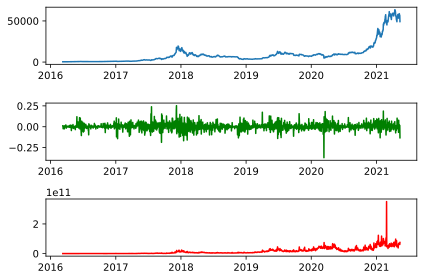

In [22]:
#plotting close, percentage change and volume for bitcoin
fig, (ax1,ax2,ax3) = plt.subplots(3,1)

ax1.plot(btc['Date'],btc['Close'])
ax2.plot(btc['Date'],btc['Change %'],color = 'g')
ax3.plot(btc['Date'],btc['Volume'],color = 'r')


fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.tight_layout()
%config InlineBackend.figure_format = 'svg'

In [23]:
#removing all columns that are not required and renaming for easy use.
btc['close']=btc['Close']
btc['pct_chng']=btc['Change %']
btc['vol']=btc['Volume']

btc_cleaned=btc.drop(btc.iloc[:,1:8], axis = 1)

btc_cleaned

,Date,close,pct_chng,vol
0,2016-03-10,417.131012,0.010929,8.102290e+07
1,2016-03-11,421.690002,0.010929,7.396970e+07
2,2016-03-12,411.623993,-0.023871,9.271290e+07
3,2016-03-13,414.065002,0.005930,7.432280e+07
4,2016-03-14,416.437988,0.005731,9.525940e+07
...,...,...,...,...
1885,2021-05-08,58803.777344,0.025235,6.538298e+10
1886,2021-05-09,58232.316406,-0.009718,6.590669e+10
1887,2021-05-10,55859.796875,-0.040742,7.177655e+10
1888,2021-05-11,56704.574219,0.015123,6.130840e+10


In [24]:
#creating a new dataset for cleaned file
btc_cleaned.to_csv('./datasets/btc.csv')

In [25]:
#Checking doge data
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-10,0.000230,0.000247,0.000227,0.000241,0.000241,3.537580e+05
1,2016-03-11,0.000246,0.000247,0.000237,0.000241,0.000241,3.137350e+05
2,2016-03-12,0.000242,0.000243,0.000233,0.000237,0.000237,2.265980e+05
3,2016-03-13,0.000237,0.000245,0.000233,0.000245,0.000245,1.848720e+05
4,2016-03-14,0.000241,0.000246,0.000234,0.000238,0.000238,2.105860e+05
...,...,...,...,...,...,...,...
1885,2021-05-08,0.687801,0.737567,0.608168,0.636439,0.636439,2.555513e+10
1886,2021-05-09,0.635820,0.697625,0.425706,0.570070,0.570070,4.613806e+10
1887,2021-05-10,0.569687,0.569687,0.421291,0.449964,0.449964,1.651452e+10
1888,2021-05-11,0.450488,0.546651,0.445034,0.495231,0.495231,1.456698e+10


In [28]:
#looking at datatype and nuill values
doge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1890 non-null   object 
 1   Open       1886 non-null   float64
 2   High       1886 non-null   float64
 3   Low        1886 non-null   float64
 4   Close      1886 non-null   float64
 5   Adj Close  1886 non-null   float64
 6   Volume     1886 non-null   float64
dtypes: float64(6), object(1)
memory usage: 103.5+ KB


In [35]:
# a function with a for loop to fill missing values with forward fill ie. the previous value
def fill_missing_val(x):
        for col in x:
            x[col].fillna(method='ffill',inplace = True)
        return   x.isnull().any()


#creating a new function to clean data
def crypto_cleaner(x):
    x['Change %']= x['Close'].pct_change()
    x['Change %'].fillna(method = 'bfill',inplace = True)
    x.Date = x.Date.astype('datetime64')
    return x.info()
    
#creating a new function to plot data
def crypto_plotter(x):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1)

    ax1.plot(x['Date'],x['Close'])
    ax2.plot(x['Date'],x['Change %'],color = 'g')
    ax3.plot(x['Date'],x['Volume'],color = 'r')


    fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

    plt.tight_layout()
    %config InlineBackend.figure_format = 'svg'
    plt.show()

#creating a function to drop unnecessary data
def crypto_dropper(x):
    x['close']=x['Close']
    x['pct_chng']=x['Change %']
    x['vol']=x['Volume']

    x.drop(x.iloc[:,1:8], axis = 1, inplace=True)

    return x

#creating a function to combine previous 3 functions
def crypto_processor(x):
    fill_missing_val(x)
    crypto_cleaner(x)
    crypto_plotter(x)
    crypto_dropper(x)
    return x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1890 non-null   datetime64[ns]
 1   Open       1890 non-null   float64       
 2   High       1890 non-null   float64       
 3   Low        1890 non-null   float64       
 4   Close      1890 non-null   float64       
 5   Adj Close  1890 non-null   float64       
 6   Volume     1890 non-null   float64       
 7   Change %   1890 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 118.2 KB


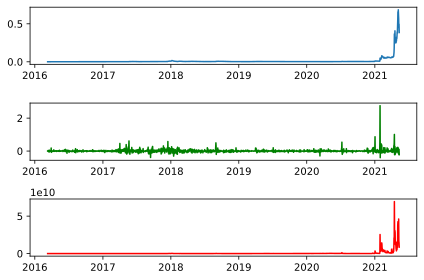

,Date,close,pct_chng,vol
0,2016-03-10,0.000241,0.000000,3.537580e+05
1,2016-03-11,0.000241,0.000000,3.137350e+05
2,2016-03-12,0.000237,-0.016598,2.265980e+05
3,2016-03-13,0.000245,0.033755,1.848720e+05
4,2016-03-14,0.000238,-0.028571,2.105860e+05
...,...,...,...,...
1885,2021-05-08,0.636439,-0.070589,2.555513e+10
1886,2021-05-09,0.570070,-0.104282,4.613806e+10
1887,2021-05-10,0.449964,-0.210686,1.651452e+10
1888,2021-05-11,0.495231,0.100601,1.456698e+10


In [36]:
crypto_processor(doge)

In [37]:
doge.to_csv('./datasets/doge.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1412 non-null   datetime64[ns]
 1   Open       1412 non-null   float64       
 2   High       1412 non-null   float64       
 3   Low        1412 non-null   float64       
 4   Close      1412 non-null   float64       
 5   Adj Close  1412 non-null   float64       
 6   Volume     1412 non-null   float64       
 7   Change %   1412 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 88.4 KB


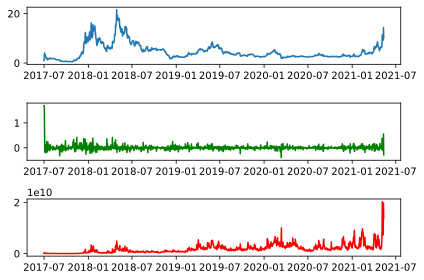

,Date,close,pct_chng,vol
0,2017-07-01,1.006690,1.692040,1.361300e+07
1,2017-07-02,2.710050,1.692040,3.204520e+08
2,2017-07-03,4.086640,0.507957,4.149500e+08
3,2017-07-04,3.372000,-0.174872,2.185590e+08
4,2017-07-05,3.003230,-0.109362,1.243390e+08
...,...,...,...,...
1407,2021-05-08,10.359125,-0.006431,7.625978e+09
1408,2021-05-09,10.531153,0.016606,7.180486e+09
1409,2021-05-10,9.255657,-0.121116,7.999780e+09
1410,2021-05-11,14.365542,0.552082,1.974729e+10


In [38]:
crypto_processor(eos)

In [40]:
eos.to_csv('./datasets/eos.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1320 non-null   datetime64[ns]
 1   Open       1320 non-null   float64       
 2   High       1320 non-null   float64       
 3   Low        1320 non-null   float64       
 4   Close      1320 non-null   float64       
 5   Adj Close  1320 non-null   float64       
 6   Volume     1320 non-null   float64       
 7   Change %   1320 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 82.6 KB


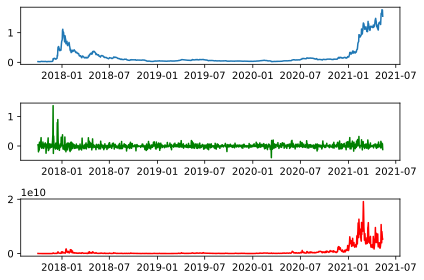

,Date,close,pct_chng,vol
0,2017-10-01,0.024969,0.038568,5.006870e+07
1,2017-10-02,0.025932,0.038568,5.764130e+07
2,2017-10-03,0.020816,-0.197285,1.699780e+07
3,2017-10-04,0.021931,0.053565,9.000050e+06
4,2017-10-05,0.021489,-0.020154,5.562510e+06
...,...,...,...,...
1315,2021-05-08,1.619554,-0.020502,3.959173e+09
1316,2021-05-09,1.770562,0.093240,8.065503e+09
1317,2021-05-10,1.644696,-0.071088,6.463330e+09
1318,2021-05-11,1.764077,0.072585,5.428572e+09


In [41]:
crypto_processor(ada)

In [42]:
ada.to_csv('./datasets/ada.csv')